<a href="https://colab.research.google.com/github/blowmeaway1234/Artificial-Intelligence/blob/main/W9_Artificial_Neuron_Network_ANN_CNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cifar10

In [114]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

Check Data

In [115]:
x_train.shape

(50000, 32, 32, 3)

In [116]:
y_train.shape

(50000, 1)

In [117]:
x_test.shape

(10000, 32, 32, 3)

In [118]:
y_test.shape

(10000, 1)

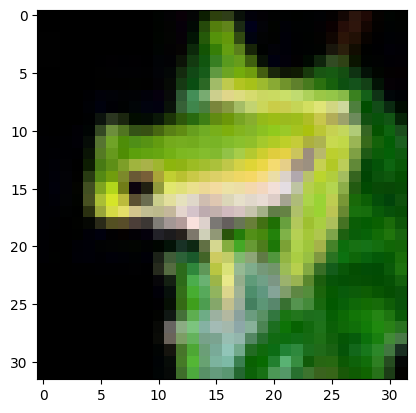

Number: [6]


In [119]:
import matplotlib.pyplot as plt
digit = x_train[104]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print('Number:',y_train[104])

<ipython-input-120-0e47cadcf93d>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)


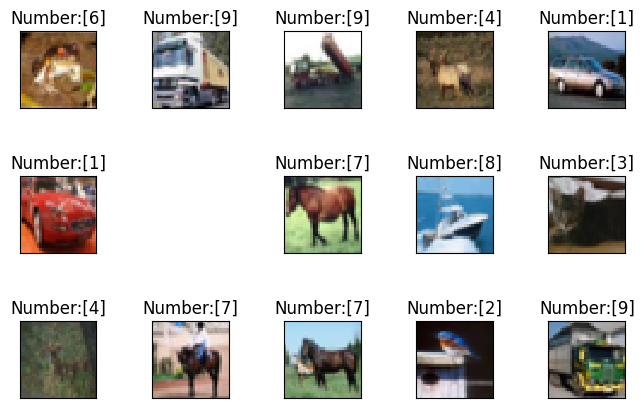

In [120]:
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow((x_train[i]),cmap='gray',
             interpolation='None')
  plt.title('Number:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [121]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(3000, activation='relu', input_shape = (32*32*3,)))
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 3000)              9219000   
                                                                 
 dense_41 (Dense)            (None, 1000)              3001000   
                                                                 
 dense_42 (Dense)            (None, 500)               500500    
                                                                 
 dense_43 (Dense)            (None, 10)                5010      
                                                                 
Total params: 12,725,510
Trainable params: 12,725,510
Non-trainable params: 0
_________________________________________________________________


In [122]:
x= x_test
y= y_test

In [123]:
x_train=x_train.reshape(50000,32*32*3)
x_train=x_train.astype('float32')/255
x_test=x_test.reshape(10000,32*32*3)
x_test=x_test.astype('float32')/255

In [124]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [125]:
y_train.shape

(50000, 10)

In [126]:
y_test.shape

(10000, 10)

In [127]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128)
test_loss,test_acc = model.evaluate(x_test,y_test)
print('Mất mát:',test_loss)
print('Accuracy:',test_acc)

Epoch 1/10
391/391 [==============================] - 118s 300ms/step - loss: 2.2563 - accuracy: 0.2540
Epoch 2/10
391/391 [==============================] - 116s 296ms/step - loss: 1.8067 - accuracy: 0.3478
Epoch 3/10
391/391 [==============================] - 117s 300ms/step - loss: 1.7069 - accuracy: 0.3846
Epoch 4/10
391/391 [==============================] - 116s 296ms/step - loss: 1.6348 - accuracy: 0.4146
Epoch 5/10
391/391 [==============================] - 126s 323ms/step - loss: 1.5772 - accuracy: 0.4365
Epoch 6/10
391/391 [==============================] - 120s 306ms/step - loss: 1.5322 - accuracy: 0.4515
Epoch 7/10
391/391 [==============================] - 123s 314ms/step - loss: 1.4887 - accuracy: 0.4668
Epoch 8/10
391/391 [==============================] - 119s 303ms/step - loss: 1.4450 - accuracy: 0.4825
Epoch 9/10
391/391 [==============================] - 120s 308ms/step - loss: 1.4125 - accuracy: 0.4921
Epoch 10/10
313/313 [==============================] - 10s 33ms/

In [129]:
 model.save('test1.h5')

1/1 [==============================] - 0s 30ms/step


array([4])

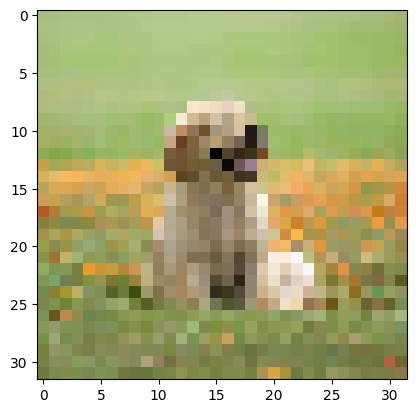

In [137]:
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

img = load_img('dog.jpg', target_size=(32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)

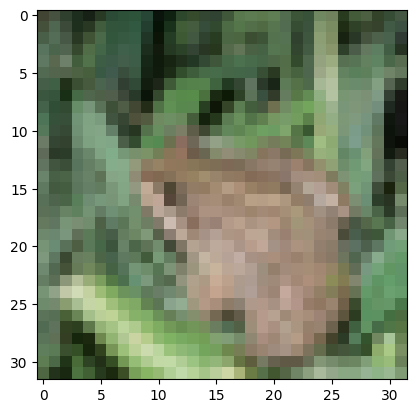

Number: [6]


In [136]:
import matplotlib.pyplot as plt
digit = x[4]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print('Number:',y[4])